In [3]:
days_per_month = {1: 31, 2: 28, 3: 31, 4: 30,
                  5: 31, 6: 30, 7: 31, 8: 31,
                  9: 30, 10: 31, 11: 30, 12: 31}

link_format = "http://www.wunderground.com/history/airport/KNYC/{}/{}/{}/DailyHistory.html"
links = [link_format.format(year, month, day)
         for year in range(2013, 2016) # 2013 - 2015 inclusive
         for month in range(1, 13)     # 1 - 12 inclusive
         for day in range(1, days_per_month[month] + 1)]

print(len(links))
print("\n".join(links[:5]))

1095
http://www.wunderground.com/history/airport/KNYC/2013/1/1/DailyHistory.html
http://www.wunderground.com/history/airport/KNYC/2013/1/2/DailyHistory.html
http://www.wunderground.com/history/airport/KNYC/2013/1/3/DailyHistory.html
http://www.wunderground.com/history/airport/KNYC/2013/1/4/DailyHistory.html
http://www.wunderground.com/history/airport/KNYC/2013/1/5/DailyHistory.html


In [4]:
import requests
import os.path

def download_file(link, name):
    if os.path.isfile(name):
        return
    file = open(name, 'w')
    r = requests.get(link)
    file.write(r.text)
    file.close()
for i, link in enumerate(links):
    if i % 50 == 0:
        print("Done with %d.." % i)
    download_file(link, "%d.html" % i)

Done with 0..
Done with 50..
Done with 100..
Done with 150..
Done with 200..
Done with 250..
Done with 300..
Done with 350..
Done with 400..
Done with 450..
Done with 500..
Done with 550..
Done with 600..
Done with 650..
Done with 700..
Done with 750..
Done with 800..
Done with 850..
Done with 900..
Done with 950..
Done with 1000..
Done with 1050..


In [5]:
from bs4 import BeautifulSoup

with open("0.html") as fin:
    soup = BeautifulSoup(fin.read(), "html.parser")

In [6]:
all_as = soup.find_all('a')

In [7]:
all_as

[<a href="https://www.wunderground.com/member/registration">
 <i class="fi-torso sidebar-icon"></i> Sign Up / Sign In
   </a>,
 <a href="javascript:void(0);"></a>,
 <a href="/community/mail.asp" id="wuMailGot">
   WU Mail
   </a>,
 <a href="https://www.wunderground.com/member/membersettings.html">Member Settings</a>,
 <a href="/email/mainmenu.php">My Email &amp; Text Alerts</a>,
 <a class="brBot3" href="/webcams/signup.html">My Webcams</a>,
 <a href="/email/logout.php">Sign Out</a>,
 <a href="#">
 <i class="fi-widget sidebar-icon"></i> Settings
   </a>,
 <a href="javascript:void(0);">Settings</a>,
 <a class="button selected" onclick="wui.SetUnitToEnglish()" title="Switch to English">°F</a>,
 <a class="button " onclick="wui.SetUnitToMetric()" title="Switch to Metric">°C</a>,
 <a class="button selected" href="/cgi-bin/findweather/getForecast?setpref=EXPFCT&amp;value=1&amp;referer=%2fhistory%2fairport%2fKNYC%2f2013%2f1%2f1%2fDailyHistory%2ehtml" onclick="_gaq.push(['_trackEvent', 'Forecas

In [8]:
all_as = soup.find_all('a')
for i in range(5):
    print(all_as[-i])
    print()

<a href="https://www.wunderground.com/member/registration">
<i class="fi-torso sidebar-icon"></i> Sign Up / Sign In
  </a>

<a aria-label="Close" class="close-reveal-modal">×</a>

<a class="button medium radius" href="/member/registration">Remove Ads</a>

<a class="exit-off-canvas"></a>

<a class="ad-choices" href="/adchoices.asp">AdChoices</a>



In [9]:
main_table = soup.find(id='historyTable')

In [11]:
rows = main_table.find_all('tr')
print(len(rows))
for i in range(3):
    print(rows[i])
    print()

34
<tr>
<th> </th>
<th>Actual</th>
<th>Average </th>
<th>Record </th>
</tr>

<tr>
<td class="history-table-grey-header">Temperature</td>
<td class="history-table-grey-header" colspan="3"> </td>
</tr>

<tr>
<td class="indent"><span>Mean Temperature</span></td>
<td>
<span class="wx-data"><span class="wx-value">33</span><span class="wx-unit"> °F</span></span>
</td>
<td>
<span class="wx-data"><span class="wx-value">33</span><span class="wx-unit"> °F</span></span>
</td>
<td> </td>
</tr>



In [12]:
row = rows[2]
for cell in row.find_all('td'):
    print(cell)
    print()
row_name = row.find_all('td')[0].text.strip()  # Get rid of extra whitespace
row_value = row.find_all('td')[1].text.strip()
print(row_name, ":", row_value)

<td class="indent"><span>Mean Temperature</span></td>

<td>
<span class="wx-data"><span class="wx-value">33</span><span class="wx-unit"> °F</span></span>
</td>

<td>
<span class="wx-data"><span class="wx-value">33</span><span class="wx-unit"> °F</span></span>
</td>

<td> </td>

Mean Temperature : 33 °F


In [15]:
for row in rows:
    #Only process the rows with 4 cells to eliminate heading rows, etc.
    if len(row.find_all('td')) == 4:
        row_name = row.find_all('td')[0].text.strip()
        row_value = row.find_all('td')[1].text.strip() 
        print(row_name, ":", row_value)  

Mean Temperature : 33 °F
Max Temperature : 40 °F
Min Temperature : 26 °F
Heating Degree Days : 32
Month to date heating degree days : 32
Since 1 July heating degree days : 1622
Cooling Degree Days : 0
Month to date cooling degree days : 0
Year to date cooling degree days : 0
Dew Point : 22 °F
Average Humidity : 54
Maximum Humidity : 64
Minimum Humidity : 44
Precipitation : 0.00 in
Month to date precipitation : 0.00
Year to date precipitation : 0.00
Snow : 0.00 in
Month to date snowfall : 0.0
Since 1 July snowfall : 5.1
Snow Depth : 0.00 in
Sea Level Pressure : 29.90 in
Wind Speed : 7 mph
 (WNW)
Max Wind Speed : 15 mph
Max Gust Speed : 26 mph
Visibility : 10 miles
Events : 


In [16]:
fields = ['Mean Temperature', 'Max Temperature', 'Min Temperature',\
          'Dew Point', 'Average Humidity', 'Maximum Humidity',\
          'Minimum Humidity', 'Precipitation', 'Wind Speed',\
          'Max Wind Speed', 'Max Gust Speed']
def scrape_file(name):
    with open(name) as fin:
        soup = BeautifulSoup(fin.read(), "html.parser")
    data = {}
    for row in soup.find(id="historyTable").find_all("tr"):
        cells = row.find_all("td")
        if len(cells) == 4:
            name = cells[0].text.strip()
            if name in fields:
                data[name] = cells[1].text.split()[0].strip()   # Split to remove units
    return data
scrape_file("0.html")

{'Average Humidity': '54',
 'Dew Point': '22',
 'Max Gust Speed': '26',
 'Max Temperature': '40',
 'Max Wind Speed': '15',
 'Maximum Humidity': '64',
 'Mean Temperature': '33',
 'Min Temperature': '26',
 'Minimum Humidity': '44',
 'Precipitation': '0.00',
 'Wind Speed': '7'}

In [17]:
import csv

csv_fields = ["Month", "Day", "Year"] + fields

with open("weather_data.csv", "w") as fout:
    writer = csv.DictWriter(fout, csv_fields)
    writer.writeheader()

    for i, link in enumerate(links):
        data = scrape_file("{}.html".format(i))
        url_parts = link.split("/")
        data["Month"] = int(url_parts[-3])
        data["Year"] = int(url_parts[-4])
        data["Day"] = int(url_parts[-2])

        writer.writerow(data)

In [18]:
import pandas as pd

data = pd.read_csv('weather_data.csv')
pd.options.display.max_rows = 7
data

,Month,Day,Year,Mean Temperature,Max Temperature,Min Temperature,Dew Point,Average Humidity,Maximum Humidity,Minimum Humidity,Precipitation,Wind Speed,Max Wind Speed,Max Gust Speed
0,1,1,2013,33,40,26,22,54,64,44,0.00,7,15,26
1,1,2,2013,28,33,22,11,48,57,39,0.00,6,15,22
2,1,3,2013,28,32,24,14,56,68,43,0.00,5,13,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,12,29,2015,40,46,34,37,87,92,82,0.45,7,18,24
1093,12,30,2015,43,48,38,39,81,86,76,0.19,4,9,13
1094,12,31,2015,45,48,42,37,71,92,49,0.03,5,14,20


In [19]:
data.columns = [name.lower().replace(" ", "_")
                for name in data.columns]
data

,month,day,year,mean_temperature,max_temperature,min_temperature,dew_point,average_humidity,maximum_humidity,minimum_humidity,precipitation,wind_speed,max_wind_speed,max_gust_speed
0,1,1,2013,33,40,26,22,54,64,44,0.00,7,15,26
1,1,2,2013,28,33,22,11,48,57,39,0.00,6,15,22
2,1,3,2013,28,32,24,14,56,68,43,0.00,5,13,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,12,29,2015,40,46,34,37,87,92,82,0.45,7,18,24
1093,12,30,2015,43,48,38,39,81,86,76,0.19,4,9,13
1094,12,31,2015,45,48,42,37,71,92,49,0.03,5,14,20


In [20]:
data["dew_point"]

0       22
1       11
2       14
        ..
1092    37
1093    39
1094    37
Name: dew_point, dtype: int64

In [21]:
print(data["dew_point"].mean())
data["dew_point"] * 5

40.2630136986


0       110
1        55
2        70
       ... 
1092    185
1093    195
1094    185
Name: dew_point, dtype: int64

In [22]:
print(len(data))
print(len(data.columns))
data.columns

1095
14


Index(['month', 'day', 'year', 'mean_temperature', 'max_temperature',
       'min_temperature', 'dew_point', 'average_humidity', 'maximum_humidity',
       'minimum_humidity', 'precipitation', 'wind_speed', 'max_wind_speed',
       'max_gust_speed'],
      dtype='object')

In [23]:
data.shape

(1095, 14)

In [24]:
data.iloc[0]

month                1
day                  1
year              2013
                  ... 
wind_speed           7
max_wind_speed      15
max_gust_speed      26
Name: 0, dtype: object

In [25]:
december_data = data[data.month == 12]
december_data[:5]

,month,day,year,mean_temperature,max_temperature,min_temperature,dew_point,average_humidity,maximum_humidity,minimum_humidity,precipitation,wind_speed,max_wind_speed,max_gust_speed
334,12,1,2013,43,49,36,29,61,76,46,0.00,2,7,10
335,12,2,2013,45,49,41,34,68,82,53,0.00,3,8,11
336,12,3,2013,46,53,38,34,66,86,46,0.00,3,8,12
337,12,4,2013,47,52,41,36,64,73,54,0.00,3,8,12
338,12,5,2013,54,60,48,50,83,93,72,0.01,2,9,17


In [26]:
may_2015_data = data[(data.month == 5) & (data.year == 2015)]
may_2015_data[:5]

,month,day,year,mean_temperature,max_temperature,min_temperature,dew_point,average_humidity,maximum_humidity,minimum_humidity,precipitation,wind_speed,max_wind_speed,max_gust_speed
850,5,1,2015,56,63,49,39,59,71,46,0.00,5,14,18
851,5,2,2015,61,74,48,40,56,80,31,0.00,3,15,22
852,5,3,2015,66,80,51,38,41,59,22,0.00,3,10,18
853,5,4,2015,71,85,57,44,47,72,22,0.00,5,15,23
854,5,5,2015,76,85,66,50,44,53,34,0.00,4,13,21


In [27]:
data.dtypes

month              int64
day                int64
year               int64
                   ...  
wind_speed        object
max_wind_speed    object
max_gust_speed    object
dtype: object

In [29]:
data.precipitation.unique()

array(['0.00', 'T', '0.55', '0.02', '0.09', '0.12', '0.69', '0.07', '0.22',
       '0.06', '0.04', '0.90', '1.15', '0.38', '0.49', '0.03', '0.15',
       '0.26', '0.01', '0.14', '1.56', '0.19', '0.56', '0.79', '0.60',
       '0.36', '0.17', '0.08', '0.63', '0.05', '3.02', '0.50', '1.09',
       '1.81', '0.30', '0.52', '0.85', '0.87', '0.13', '4.16', '0.48',
       '1.38', '1.26', '0.24', '0.84', '0.53', '0.23', '0.25', '0.31',
       '0.65', '0.46', '0.43', '1.60', '0.72', '0.45', '0.51', '1.98',
       '0.73', '1.20', '0.33', '0.29', '0.11', '0.10', '1.17', '1.43',
       '1.78', '0.16', '0.35', '0.92', '0.21', '0.34', '0.71', '4.97',
       '0.41', '0.37', '1.54', '0.91', '0.40', '1.28', '0.96', '0.39',
       '1.30', '0.62', '0.32', '1.18', '1.11', '1.51', '0.61', '0.20',
       '0.70', '1.24', '1.22', '2.54', '0.80', '2.10', '1.02', '0.67',
       '0.76', '0.81', '0.27', '1.37', '1.46', '0.57', '0.64', '1.12',
       '0.42', '1.95', '1.58', '1.08', '0.89', '1.40', '1.25', '1.21',
 

In [30]:
clean_data = data.convert_objects(convert_numeric=True)
print(clean_data.dtypes)
clean_data.precipitation.unique()

month               int64
day                 int64
year                int64
                   ...   
wind_speed        float64
max_wind_speed    float64
max_gust_speed    float64
dtype: object


C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


array([ 0.  ,   nan,  0.55,  0.02,  0.09,  0.12,  0.69,  0.07,  0.22,
        0.06,  0.04,  0.9 ,  1.15,  0.38,  0.49,  0.03,  0.15,  0.26,
        0.01,  0.14,  1.56,  0.19,  0.56,  0.79,  0.6 ,  0.36,  0.17,
        0.08,  0.63,  0.05,  3.02,  0.5 ,  1.09,  1.81,  0.3 ,  0.52,
        0.85,  0.87,  0.13,  4.16,  0.48,  1.38,  1.26,  0.24,  0.84,
        0.53,  0.23,  0.25,  0.31,  0.65,  0.46,  0.43,  1.6 ,  0.72,
        0.45,  0.51,  1.98,  0.73,  1.2 ,  0.33,  0.29,  0.11,  0.1 ,
        1.17,  1.43,  1.78,  0.16,  0.35,  0.92,  0.21,  0.34,  0.71,
        4.97,  0.41,  0.37,  1.54,  0.91,  0.4 ,  1.28,  0.96,  0.39,
        1.3 ,  0.62,  0.32,  1.18,  1.11,  1.51,  0.61,  0.2 ,  0.7 ,
        1.24,  1.22,  2.54,  0.8 ,  2.1 ,  1.02,  0.67,  0.76,  0.81,
        0.27,  1.37,  1.46,  0.57,  0.64,  1.12,  0.42,  1.95,  1.58,
        1.08,  0.89,  1.4 ,  1.25,  1.21,  1.55])

In [31]:
clean_data = clean_data.dropna()

In [32]:
pd.options.display.max_rows = 999
clean_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
month,1008,6.583333,3.420686,1,4,7,10.00,12.00
day,1008,15.585317,8.798791,1,8,15,23.00,31.00
year,1008,2014.009921,0.818056,2013,2013,2014,2015.00,2015.00
mean_temperature,1008,56.093254,18.044831,11,42,58,72.00,90.00
max_temperature,1008,63.052579,18.898837,18,47,65,80.00,98.00
min_temperature,1008,48.629960,17.503609,2,35,50,64.00,83.00
dew_point,1008,40.452381,19.303506,-12,26,43,56.00,73.00
average_humidity,1008,59.195437,13.629751,27,49,58,69.00,96.00
maximum_humidity,1008,75.399802,14.968550,39,64,76,89.00,100.00
minimum_humidity,1008,42.499008,14.828714,11,32,40,51.00,92.00


In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

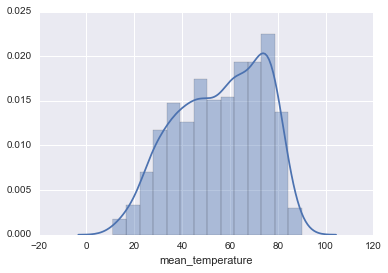

In [34]:
sns.distplot(clean_data.mean_temperature)

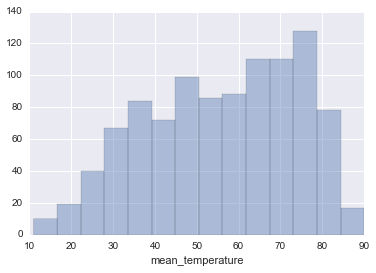

In [36]:
sns.distplot(clean_data.mean_temperature, kde=False)


In [37]:
<matplotlib.axes._subplots.AxesSubplot at 0x107bd66d8>

SyntaxError: invalid syntax (<ipython-input-37-001e0719d011>, line 1)

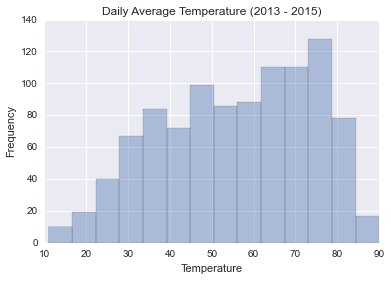

In [38]:
sns.distplot(clean_data.mean_temperature, kde=False)
sns.plt.title('Daily Average Temperature (2013 - 2015)')
sns.plt.xlabel('Temperature')
sns.plt.ylabel('Frequency')

(0, 50)

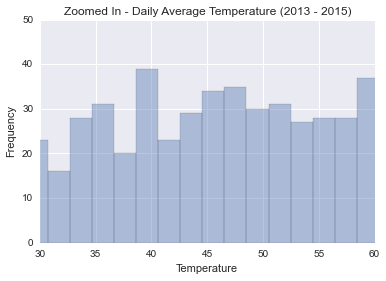

In [39]:
sns.distplot(clean_data.mean_temperature, kde=False, bins=40)
sns.plt.title('Zoomed In - Daily Average Temperature (2013 - 2015)')
sns.plt.xlabel('Temperature')
sns.plt.ylabel('Frequency')
sns.plt.xlim((30, 60))
sns.plt.ylim((0, 50))

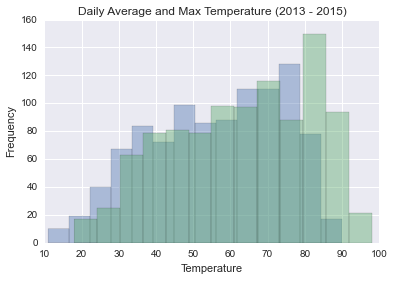

In [40]:
sns.distplot(clean_data.mean_temperature, kde=False)
sns.distplot(clean_data.max_temperature, kde=False)
sns.plt.title('Daily Average and Max Temperature (2013 - 2015)')
sns.plt.xlabel('Temperature')
sns.plt.ylabel('Frequency')

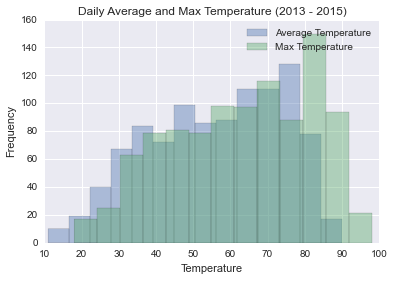

In [41]:
sns.distplot(clean_data.mean_temperature, kde=False, label="Average Temperature")
sns.distplot(clean_data.max_temperature, kde=False, label="Max Temperature")
sns.plt.title('Daily Average and Max Temperature (2013 - 2015)')
sns.plt.xlabel('Temperature')
sns.plt.ylabel('Frequency')
sns.plt.legend()

C:\Users\Steve\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


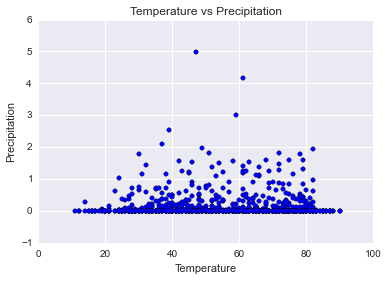

In [42]:
sns.plt.scatter(clean_data.mean_temperature, clean_data.precipitation)
sns.plt.title('Temperature vs Precipitation')
sns.plt.xlabel('Temperature')
sns.plt.ylabel('Precipitation')

C:\Users\Steve\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


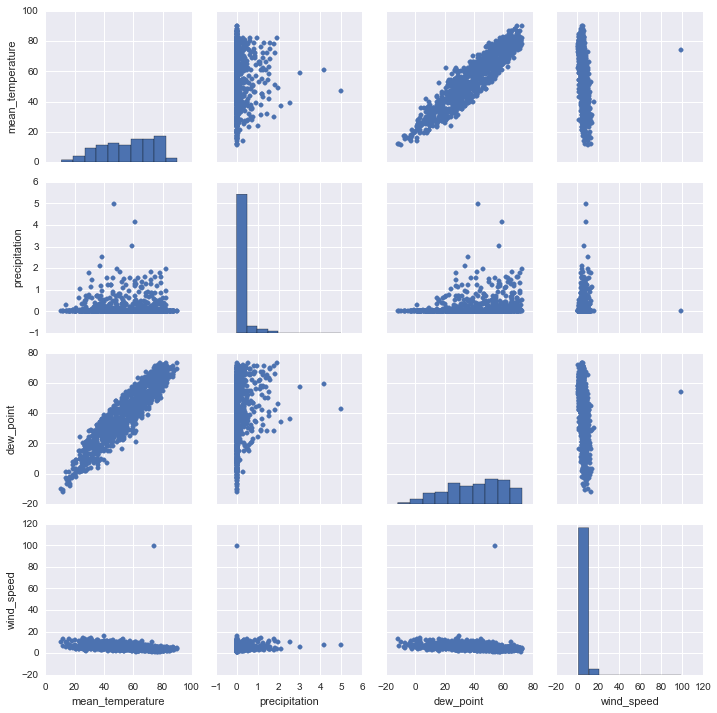

In [43]:
sns.pairplot(clean_data, vars=["mean_temperature", "precipitation", "dew_point", "wind_speed"])


In [44]:
clean_data.to_csv('clean_weather_data.csv', index=False)

In [45]:
import pandas as pd

data = pd.read_csv('clean_weather_data.csv')
print(data.dtypes)
data[:5]

month                 int64
day                   int64
year                  int64
mean_temperature      int64
max_temperature       int64
min_temperature       int64
dew_point             int64
average_humidity      int64
maximum_humidity      int64
minimum_humidity      int64
precipitation       float64
wind_speed          float64
max_wind_speed      float64
max_gust_speed      float64
dtype: object


,month,day,year,mean_temperature,max_temperature,min_temperature,dew_point,average_humidity,maximum_humidity,minimum_humidity,precipitation,wind_speed,max_wind_speed,max_gust_speed
0,1,1,2013,33,40,26,22,54,64,44,0,7,15,26
1,1,2,2013,28,33,22,11,48,57,39,0,6,15,22
2,1,3,2013,28,32,24,14,56,68,43,0,5,13,20
3,1,4,2013,34,37,30,19,56,63,48,0,8,18,28
4,1,5,2013,37,42,32,19,48,56,39,0,7,17,26


In [48]:
from sklearn.cross_validation import train_test_split

X = data.drop('precipitation', axis=1)
y = data.precipitation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

C:\Users\Steve\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_neighbors=3, p=2, weights='uniform')

In [50]:
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: Passing additional arguments to the metric function as **kwargs is deprecated and will no longer be supported in 0.18. Use metric_params instead.
  app.launch_new_instance()
C:\Users\Steve\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params={'n_jobs': 1}, n_neighbors=3, p=2,
          weights='uniform')

In [51]:
knn_y = knn_model.predict(X_test)

knn_sum_squares = ((knn_y - y_test) ** 2).sum()
mean_sum_squares = ((y_test.mean() - y_test) ** 2).sum()

print("Average loss:", mean_sum_squares)
print("KNN loss:", knn_sum_squares)
print("Variation explained: ", 100 * (1 - knn_sum_squares / mean_sum_squares), "%", sep="")

Average loss: 21.0529148515
KNN loss: 17.6196666667
Variation explained: 16.3077094504%


In [53]:
print("R^2: ", knn_model.score(X_test, y_test))

R^2:  0.163077094504


In [54]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

C:\Users\Steve\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [55]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


C:\Users\Steve\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
print(linear_model.score(X_test, y_test))


0.295698911054


C:\Users\Steve\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


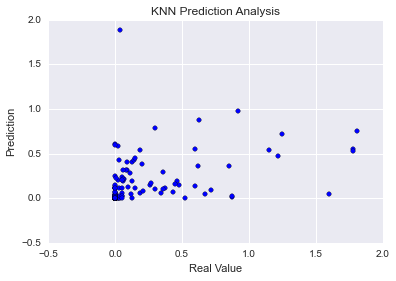

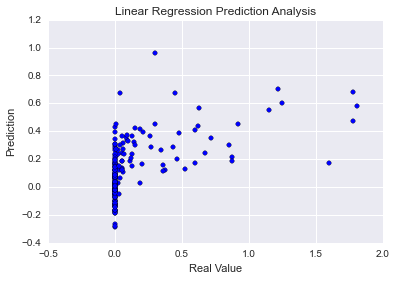

In [57]:
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

sns.plt.scatter(y_test, knn_model.predict(X_test))
sns.plt.title('KNN Prediction Analysis')
sns.plt.xlabel('Real Value')
sns.plt.ylabel('Prediction')
plt.show()

sns.plt.scatter(y_test, linear_model.predict(X_test))
sns.plt.title('Linear Regression Prediction Analysis')
sns.plt.xlabel('Real Value')
sns.plt.ylabel('Prediction')
plt.show()

In [58]:
import pandas as pd

df = pd.read_csv("clean_weather_data.csv")
df.head()

,month,day,year,mean_temperature,max_temperature,min_temperature,dew_point,average_humidity,maximum_humidity,minimum_humidity,precipitation,wind_speed,max_wind_speed,max_gust_speed
0,1,1,2013,33,40,26,22,54,64,44,0,7,15,26
1,1,2,2013,28,33,22,11,48,57,39,0,6,15,22
2,1,3,2013,28,32,24,14,56,68,43,0,5,13,20
3,1,4,2013,34,37,30,19,56,63,48,0,8,18,28
4,1,5,2013,37,42,32,19,48,56,39,0,7,17,26


In [60]:
import numpy as np

y = np.array(df["precipitation"] != 0, dtype=int)
data = df.drop('precipitation',axis=1)

In [63]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()
new_day = one_hot.fit_transform(data[["month","day"]]).toarray()

In [64]:
new_day[0, :]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.])

In [65]:
X = np.hstack([new_day, data.values[:, 2:]])

In [66]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [67]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.84653465346534651

In [68]:
from sklearn.grid_search import GridSearchCV

parameters = {"kernel": ["linear"], 
              'C': [10 ** i for i in range(-5, 2)]}
search = GridSearchCV(SVC(), param_grid=parameters, refit=True, cv=5)
search.fit(X_train, y_train)

C:\Users\Steve\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\Steve\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\Steve\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\Steve\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\Steve\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs,

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear']},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [71]:
    GridSearchCV(cv=5, error_score='raise',
           estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False),
           fit_params={}, iid=True, n_jobs=1,
           param_grid={'kernel': ['linear'], 'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
           pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


TypeError: __init__() got an unexpected keyword argument 'decision_function_shape'

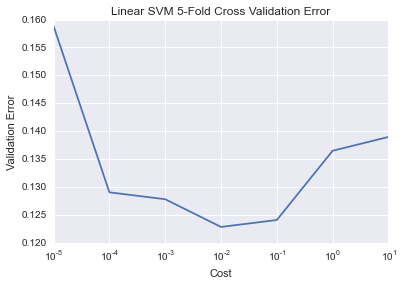

In [72]:
#plot the validation error

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

errs = [1 - score[1] for score in search.grid_scores_]
cs = parameters["C"]
plt.plot(cs,errs)
plt.semilogx()
plt.xlabel("Cost")
plt.ylabel("Validation Error")
plt.title("Linear SVM 5-Fold Cross Validation Error")

In [73]:
search.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [74]:
search.score(X_test, y_test)


0.92079207920792083

In [76]:
params = {"kernel":["rbf"], 
          "C":[10**i for i in np.arange(-1, 3, .5)],
          "gamma":[10**i for i in np.arange(-10, 0)]}

search = GridSearchCV(SVC(), param_grid=params, refit=True, cv=5)
search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
           estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False),
           fit_params={}, iid=True, n_jobs=1,
           param_grid={'kernel': ['rbf'], 'C': [0.10000000000000001, 0.31622776601683794, 1.0, 3.1622776601683795, 10.0, 31.622776601683793, 100.0, 316.22776601683796], 'gamma': [1e-10, 1.0000000000000001e-09, 1e-08, 9.9999999999999995e-08, 9.9999999999999995e-07, 1.0000000000000001e-05, 0.0001, 0.001, 0.01, 0.10000000000000001]},
           pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

C:\Users\Steve\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\Steve\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\Steve\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\Steve\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)
C:\Users\Steve\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs,

TypeError: __init__() got an unexpected keyword argument 'decision_function_shape'

([<matplotlib.axis.YTick at 0x27156a7f470>,
 <a list of 8 Text yticklabel objects>)

C:\Users\Steve\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


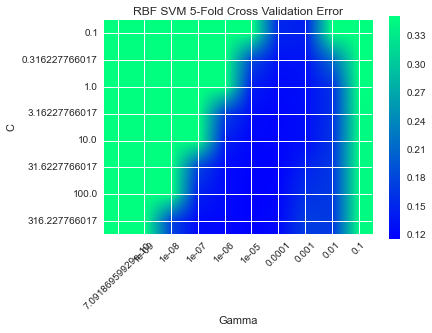

In [78]:
#plot errors
errs = [1 - score[1] for score in search.grid_scores_]

errs = np.array(errs).reshape(len(params["C"]), len(params["gamma"]))
plt.imshow(errs,cmap="winter")
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title("RBF SVM 5-Fold Cross Validation Error")
plt.colorbar()
plt.xticks(np.arange(len(params["gamma"])), params["gamma"], rotation=45)
plt.yticks(np.arange(len(params["C"])),params["C"])

In [79]:
print(search.best_params_)
print(search.score(X_test, y_test))

{'gamma': 1.0000000000000001e-05, 'C': 100.0, 'kernel': 'rbf'}
0.905940594059


In [80]:
import numpy as np
import pandas as pd

data = pd.read_csv('clean_weather_data.csv')
print(data.dtypes)
data[:5]

month                 int64
day                   int64
year                  int64
mean_temperature      int64
max_temperature       int64
min_temperature       int64
dew_point             int64
average_humidity      int64
maximum_humidity      int64
minimum_humidity      int64
precipitation       float64
wind_speed          float64
max_wind_speed      float64
max_gust_speed      float64
dtype: object


,month,day,year,mean_temperature,max_temperature,min_temperature,dew_point,average_humidity,maximum_humidity,minimum_humidity,precipitation,wind_speed,max_wind_speed,max_gust_speed
0,1,1,2013,33,40,26,22,54,64,44,0,7,15,26
1,1,2,2013,28,33,22,11,48,57,39,0,6,15,22
2,1,3,2013,28,32,24,14,56,68,43,0,5,13,20
3,1,4,2013,34,37,30,19,56,63,48,0,8,18,28
4,1,5,2013,37,42,32,19,48,56,39,0,7,17,26



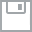
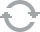
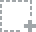
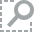
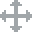
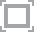
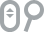
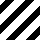
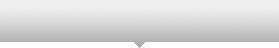
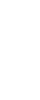
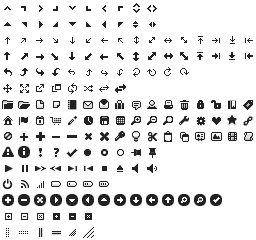
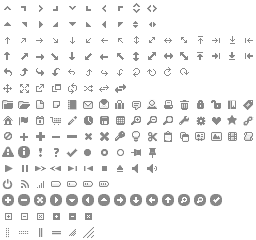
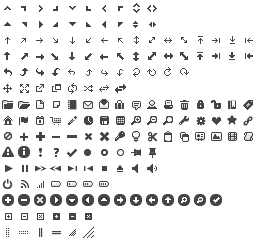
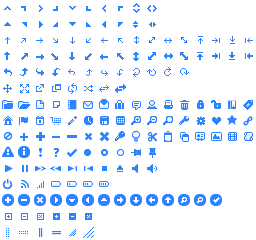
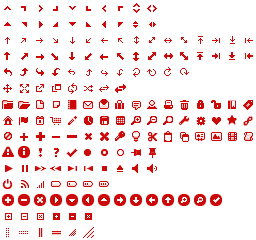
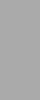
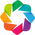
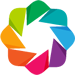

In [81]:
import bokeh.io, bokeh.plotting, bokeh.models
bokeh.io.output_notebook()

In [82]:
p = bokeh.plotting.figure()
p.circle(data.mean_temperature, data.dew_point)
bokeh.plotting.show(p)

In [83]:
q = bokeh.plotting.figure()
q.circle(data.mean_temperature, data.dew_point)
q.title = 'My Interactive Visualization'
q.xaxis.axis_label = 'Average Temperature'
q.yaxis.axis_label = 'Dew Point'
bokeh.plotting.show(q)

In [84]:
hist_plot = bokeh.plotting.figure(title = 'Histogram of Average Temperature')
hist, edges = np.histogram(data.mean_temperature, bins = 25)
hist_plot.quad(top = hist, bottom = 0, left = edges[:-1], right = edges[1:], line_color = "#000000")
hist_plot.xaxis.axis_label = "Average Temperature"
hist_plot.yaxis.axis_label = "Frequency"
bokeh.plotting.show(hist_plot)

In [85]:
line_data = np.linspace(data.mean_temperature.min(), data.mean_temperature.max())

first = bokeh.plotting.figure()
first.circle(data.mean_temperature, data.max_temperature)
first.line(line_data, line_data)
tab1 = bokeh.models.Panel(child = first, title = 'First Plot')

second = bokeh.plotting.figure()
second.circle(data.mean_temperature, data.min_temperature)
second.line(line_data, line_data)
tab2 = bokeh.models.Panel(child = second, title = 'Second Plot')

tabs = bokeh.models.Tabs(tabs = [tab1, tab2])
bokeh.plotting.show(tabs)

In [86]:
start_value = 5
point_size = [start_value for i in range(len(data))]

source = bokeh.models.ColumnDataSource(data = dict(x = data.mean_temperature, y = data.dew_point, s = point_size))

plot = bokeh.plotting.figure()
plot.circle('x', 'y', size = 's', source = source)

callback = bokeh.models.CustomJS(args = dict(source = source), code="""
        var data = source.get('data');
        var size = cb_obj.get('value');
        x = data['x'];
        y = data['y'];
        s = data['s'];
        for (i = 0; i < x.length; i++) {
            s[i] = size;
        }
        source.trigger('change');
    """)

size = bokeh.models.Slider(start = 1, end = 10, value = start_value, step = .05, title = "Size", callback = callback)

layout = bokeh.io.vform(size, plot)

bokeh.plotting.show(layout)

In [87]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool

tooltip_source = bokeh.plotting.ColumnDataSource(data = dict(x = data.mean_temperature, y = data.dew_point,\
                                                             month = data.month, day = data.day, year = data.year))

hover = bokeh.models.HoverTool(
        tooltips = [
            ("Date", "@month-@day-@year"),
            ("Average Temperature", "@x"),
            ("Dew Point", "@y")
        ]
    )

fig = figure(tools = [hover], title = "Hover over the dots!")

fig.circle('x', 'y', source = tooltip_source)

show(fig)